# RC FILTERS
## Numerically calculating the response of an RC filter network

We can use the impedance definition for a capacitor (or an inductor) to work out the response of an RC (or RL or RLC) network. The initial math is similar to the resistor networks, but now instead of R we have Z, and complicating things a little, Z is complex. The frequency response, in a Bode plot, can be worked out using the FFT tools of Python's SciPy.

First, the simplest low pass filter is a resistor and a capacitor to ground. Like this:
<img src="rc_filter_circuit.pdf" alt="Low Pass RC Filter" style="width: 200px;"/>
For the analysis of this circuit, we first need to remember that for a resistor $Z_R = R$, and for a capacitor $Z_C = \frac{-j}{\omega C}$. The circuit forms just a voltage divider, but now with a capacitor replacing the second resistor. If the input to our circuit is a pure sinusoidal signal, then we can compute the output voltage as:
$$ V_{out}(t) = V_{in}(t) \left(\frac{Z_C}{Z_R + Z_C} \right)= V_{in}(t)\left(\frac{-j/\omega C}{R- j/\omega C} \right) = V_{in}(t)\left(\frac{1}{jR\omega C +1} \right)  $$
We could simplify this statement, or just enter it as a Python formula as is.

To do this we need to first learn about complex numbers in Python. Actually, they are really easy, if we use Numpy (or Scipy). The complex number is just $\sqrt{-1} = 1j$, so that:

In [1]:
1j*1j

(-1+0j)

As expected the square is minus one. We can now define the RC circuit as function of the frequency, where $f=\omega/2\pi$, and for simplicity we choose $V_in=1$.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def Vout(f):
    R=1000
    C=1e-6
    omega = 2*np.pi*f
    vout=( 1/(1j*R*omega*C+1))
    return(vout)

We now plot this function versus frequency, on a semi log plot, where the x axis is logarithmic. This *should* look like the plot created with the sweep simulation at: https://www.partsim.com/simulator#66937.

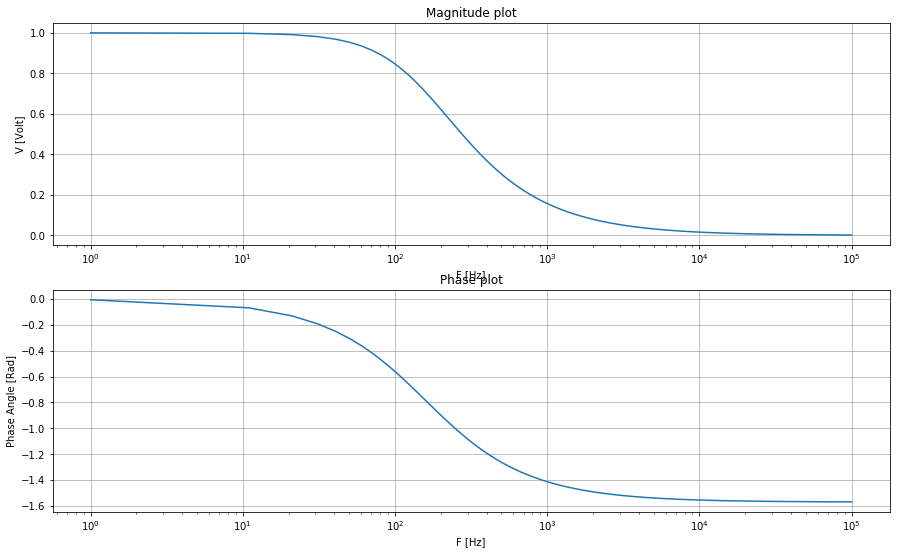

In [3]:
f = np.linspace(1,1e5,1e4)
vout_c = Vout(f)
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
plt.plot(f,np.abs(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.title("Magnitude plot")
plt.xlabel("F [Hz]")
plt.ylabel("V [Volt]")
plt.xscale("log")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(f,np.angle(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.title("Phase plot")
plt.xlabel("F [Hz]")
plt.ylabel("Phase Angle [Rad]")
plt.xscale("log")
plt.grid(True)
plt.show()

To make this a Bode plot, we would want to plot the y axis as a $20\log_{10}$.

An interesting question: "What would a square wave look like if I send it through this filter?" 
Look at the FFT tutorial notebook, and if you understand Fourier theorem, you would realize how to do this.
Here is the input waveform:

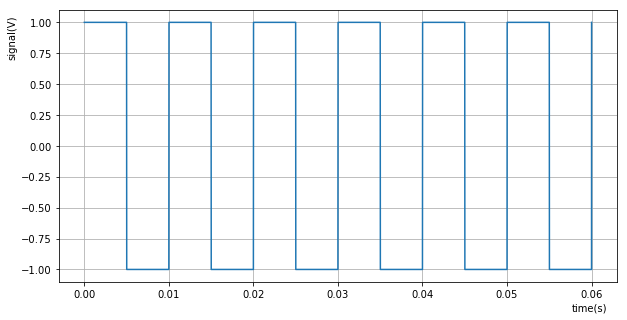

In [4]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy import signal
F = 100.
N = 10001
T = .06/N
time = np.linspace(0.,T*N,N)
y_sq =signal.square(2*np.pi*F*time)
plt.figure(figsize=(10,5))
plt.plot(time,y_sq)
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()

This is the same square wave waveform that we had before, but this time to show the effect better, I increased the frequency of the signal to 100 Hz, and plot only 0.06 sec worth of this signal.

To see what that signal looks like after our RC Filter, we need to first compute the FFT of our signal. We now essentially have the signal broken down into a very large number of sine waves, all of which need to be added together to give the signal shown above. We do this, because we only could compute what our RC filter does for a *sine* wave, and not any other shape wave. If we now multiply each of these sine waves with the function for the RC filter that we computed before, would get our output signal in the frequency domain. We then take the reverse FFT to reconstruct the signal in the time domain, which is the signal after the RC filter as you would see it on a oscilloscope.

Note the use of fftfreq, which gets us the list of frequencies. Also note that for Numpy arrays, $A*B$ is the sequential multiplication of each element of array A with the corresponding element of array B, which is exactly what we want here. Check if this output indeed corresponds with what you see on the oscilloscope.

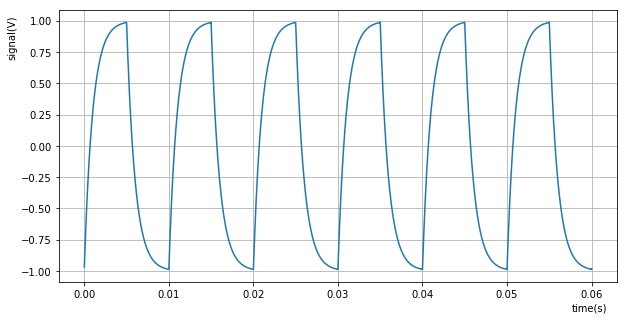

In [5]:
f_fft = fftfreq(N,T)
y_sq_fft = fft(y_sq)
y_sq_fft_out = y_sq_fft*Vout(f_fft)
y_sq_out = ifft(y_sq_fft_out)
plt.figure(figsize=(10,5))
plt.plot(time,np.real(y_sq_out))
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()
#ax.set_xlim(0.1,0.11)
plt.show()